In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
stocks = pd.read_stata('https://github.com/LeDataSciFi/lectures-spr2020/blob/master/assignment_data/stocks_2006.dta?raw=true')
stocks.name = "Stocks"

# convert to annual return and std deviation 
annual = pd.DataFrame() # open an empty dataframe
annual['ret'] = (stocks.assign(ret=stocks['ret']+1) # now we have R(t) for each observation
                       .groupby('permno')['ret']    # for each firm,
                       .prod()                      # multiple all the gross returns
                       -1                           # and subtract one to get back to the total period return
)
annual['std'] = stocks.groupby('permno')['ret'].std().mul(np.sqrt(250)) #times sqrt(250) to annualize
annual['year'] = stocks.groupby('permno')['date'].first().dt.year

# get firm information 
# this firm file is like prior, but includes more variables
# investing, financing, industry competition and more!
# VARIABLE DESCRIPTIONS IN README AT: https://github.com/LeDataSciFi/lectures-spr2020/tree/master/assignment_data
firms = pd.read_stata('https://github.com/LeDataSciFi/lectures-spr2020/blob/master/assignment_data/firms_2006_fuller.dta?raw=true')
firms.name = "Firms"

# merge firm data with annualized stock data
firms = firms.merge(left_on=['lpermno','fyear'], 
            right=annual, right_on=['permno','year'],
            how='inner') 

# and this is a subsample of a few industrys and states
subsample = firms.query('state in ["CA","NY"] & gsector in ["40","45"]') 

## Exercise: Plot returns by industry 

Scatterplot GSector and Returns, and use the full sample (firms).

Question 1: What is your reaction to this?

Question 2: Choose a different graph type to improve it visually.



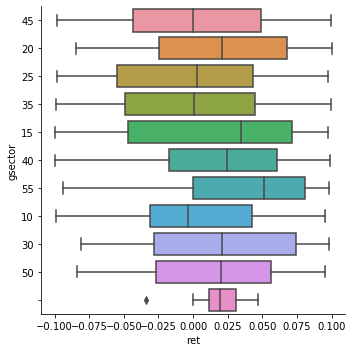

In [19]:
sns.catplot(data=firms.query('abs(ret)<.1'),y= 'gsector',x = 'ret',kind='box')

## Exercise: Plot returns vs. risk 

Scatterplot Std and Returns, and use the subsample sample (subsample).

Question: How can this be improved?

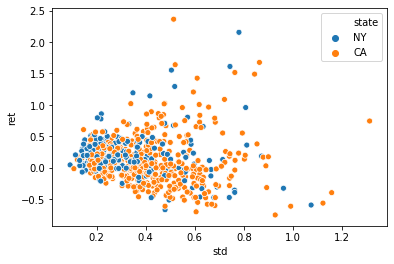

In [23]:
sns.scatterplot(data = subsample.query('std<1.5'), x='std',y='ret',hue='state')

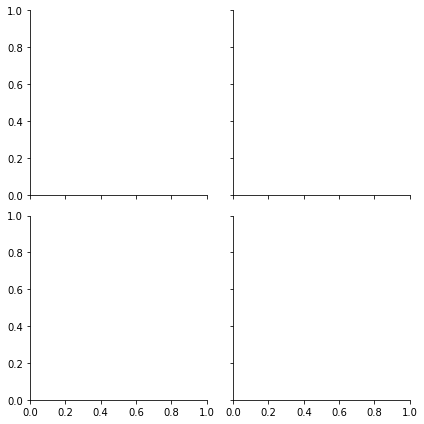

In [25]:
sns.FacetGrid(data=subsample,row='state',col='gsector')

## Exercise: Plot average returns in the industry 

Use the full sample and plot the means as a bar chart.

Question: How can this be improved?

In [10]:
sns.barplot(stocks['gsector'],stocks['ret'].mean())

KeyError: 'gsector'